In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel("C:/Users/CWC/GEOsystems/BidAssist/Tenders/Rerun 3/Civil Tenders EDA/35K EDA.xlsx")

In [3]:
df.head()

,Description,Authority,Stage,Contract Date,Contract Amount,City,Tender_ID,State,Categories,numeric_amount
0,Construction Of U/g Cement Concrete Np Two Pip...,Rural Development Department,AOC,9 Nov 2023,₹ 1 Lac,Yavatmal,2022_YAVAT_864176_1,Maharashtra,"Drainage Work, Construction Material",100000.0
1,Construction And Improvement To Nh 69 To Babul...,Public Works Department,AOC,9 Nov 2023,₹ 2.4 Cr,Nagpur,2023_PWR_926860_1,Maharashtra,"Road Construction, Highway Construction",24000000.0
2,Construction Of Sabhagruh Near Hanuman Mandir ...,Public Works Department,Financial Evaluation,9 Nov 2023,₹ 12.3 Lac,Akola,2022_PWR_836758_2,Maharashtra,"This is an estimated contract date, exact date...",1230000.0
3,Construction Of Sabhagruha For Pathorot Samaj ...,Public Works Department,Financial Evaluation,9 Nov 2023,₹ 12.3 Lac,Akola,2023_PWR_882045_5,Maharashtra,"This is an estimated contract date, exact date...",1230000.0
4,Construction Of Samajik Sabhagruha Near Balapu...,Public Works Department,Financial Evaluation,9 Nov 2023,₹ 12.3 Lac,Akola,2023_PWR_882045_6,Maharashtra,Networking Work,1230000.0


In [4]:
for column in df.columns:
    if " " in column:
        new_col = ("_").join(column.split())
        df.rename(columns={column:new_col.lower()}, inplace=True)
    else:
        df.rename(columns={column:column.lower()}, inplace=True)

In [5]:
df['contract_date'] = pd.to_datetime(df['contract_date'])
df['year'] = df['contract_date'].dt.year
df['quarter'] = df['contract_date'].dt.quarter
df['month_name'] = df['contract_date'].dt.month_name().str[:3]
df['month_no'] = df['contract_date'].dt.month
df['week_of_year'] = df['contract_date'].dt.strftime("%Y W%U")
df['week'] = df['contract_date'].dt.isocalendar().week
df['day_of_month'] = df['contract_date'].dt.day
df['day'] = df['contract_date'].dt.day_name().str[:3]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35743 entries, 0 to 35742
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   description      35743 non-null  object        
 1   authority        35743 non-null  object        
 2   stage            35743 non-null  object        
 3   contract_date    35743 non-null  datetime64[ns]
 4   contract_amount  35743 non-null  object        
 5   city             35743 non-null  object        
 6   tender_id        35743 non-null  object        
 7   state            35743 non-null  object        
 8   categories       35743 non-null  object        
 9   numeric_amount   35743 non-null  float64       
 10  year             35743 non-null  int32         
 11  quarter          35743 non-null  int32         
 12  month_name       35743 non-null  object        
 13  month_no         35743 non-null  int32         
 14  week_of_year     35743 non-null  objec

In [6]:
df.drop(columns='description', inplace=True)
df.describe(include='all')

,authority,stage,contract_date,contract_amount,city,tender_id,state,categories,numeric_amount,year,quarter,month_name,month_no,week_of_year,week,day_of_month,day
count,35743,35743,35743,35743,35743,35743,35743,35743,3.574300e+04,35743.000000,35743.000000,35743,35743.000000,35743,35743.0,35743.000000,35743
unique,175,7,NaN,2261,14,35735,8,3584,NaN,NaN,NaN,12,NaN,72,<NA>,NaN,7
top,Rural Development Department,AOC,NaN,₹ 4.9 Lac,Nagpur,2022_NHAI_121714_1,Maharashtra,"Road Construction, Civil Works",NaN,NaN,NaN,Jul,NaN,2023 W34,<NA>,NaN,Mon
freq,16604,24280,NaN,376,7505,3,33514,3400,NaN,NaN,NaN,5176,NaN,911,<NA>,NaN,6482
mean,NaN,NaN,2023-03-12 17:37:32.983800832,NaN,NaN,NaN,NaN,NaN,1.302683e+07,2022.648435,2.724422,NaN,7.093976,NaN,28.914585,15.509330,NaN
min,NaN,NaN,2022-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,-9.999900e+04,2022.000000,1.000000,NaN,1.000000,NaN,1.0,1.000000,NaN
25%,NaN,NaN,2022-11-03 00:00:00,NaN,NaN,NaN,NaN,NaN,5.700000e+05,2022.000000,2.000000,NaN,5.000000,NaN,19.0,8.000000,NaN
50%,NaN,NaN,2023-03-15 00:00:00,NaN,NaN,NaN,NaN,NaN,1.610000e+06,2023.000000,3.000000,NaN,8.000000,NaN,31.0,15.000000,NaN
75%,NaN,NaN,2023-07-22 00:00:00,NaN,NaN,NaN,NaN,NaN,4.390000e+06,2023.000000,3.000000,NaN,9.000000,NaN,39.0,23.000000,NaN
max,NaN,NaN,2023-11-09 00:00:00,NaN,NaN,NaN,NaN,NaN,1.552300e+10,2023.000000,4.000000,NaN,12.000000,NaN,52.0,31.000000,NaN


In [7]:
mp_city = ['Chhindwara', 'Balaghat', 'Multi-City']
maha_df = df[~df['city'].isin(mp_city)].reset_index(drop=True).drop(columns='state')
# maha_df.head()

In [8]:
def add_labels_on_hbars(ax, series, **kwargs):
    for index, value in enumerate(series):
        ax.text(value, index, str(value), ha='left', va='center', **kwargs)
        
def add_labels_on_vbars(ax, series, **kwargs):
    for index, value in enumerate(series):
        ax.text(index, value, str(value), ha='center', va='top', **kwargs)

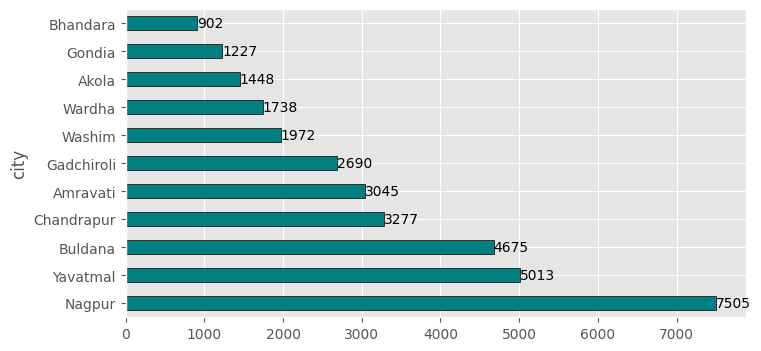

In [9]:
plt.figure(figsize=(8, 4))
ax = maha_df['city'].value_counts().plot(kind='barh', edgecolor='black', color='teal')
add_labels_on_hbars(ax, maha_df['city'].value_counts(), fontsize=10, color='black')
plt.show()

In [10]:
maha_indices_with_NA = maha_df[maha_df['numeric_amount'] == -99999].index
maha_notna_df = maha_df.drop(maha_indices_with_NA).reset_index(drop=True)

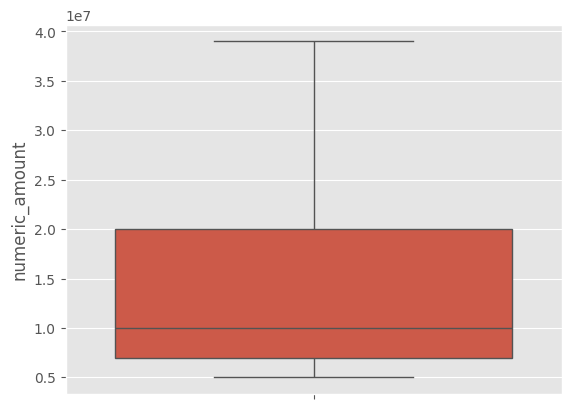

In [11]:
greater_than_50lac = maha_notna_df[maha_notna_df['numeric_amount'] >= 5e6].reset_index(drop=True)
sns.boxplot(greater_than_50lac['numeric_amount'], showfliers=False)
plt.show()

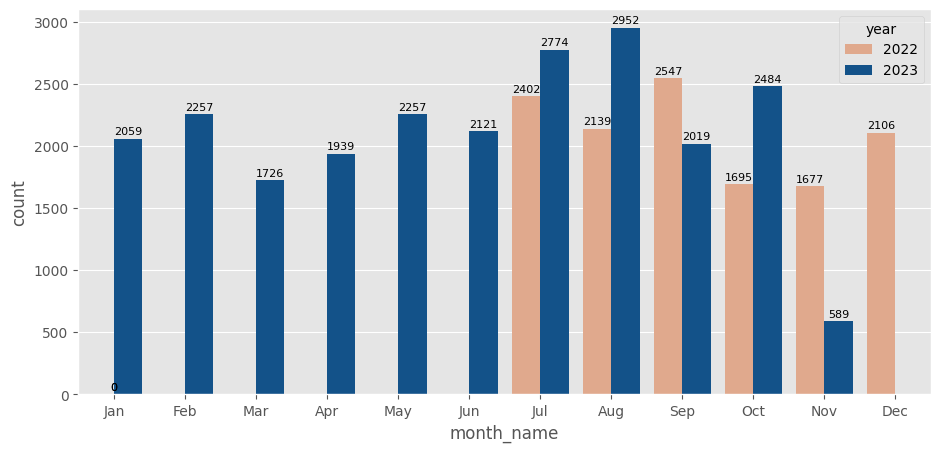

In [12]:
by_yr_month = df.groupby(['year', 'month_name', 'month_no'])['year'].count().reset_index(name='count').sort_values(by=['month_no'])
plt.figure(figsize=(11,5))
ax = sns.barplot(data=by_yr_month, x='month_name', y='count', hue='year', palette=['#EEA47F', '#00539C'])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [13]:
data = df.groupby('city')['authority'].value_counts().reset_index()
pivot_data = data.pivot(columns='city', index='authority', values="count").reset_index()
cols_list = list(pivot_data.columns)[1:]
pivot_data[cols_list] = pivot_data[cols_list].fillna(0).astype(int)
pivot_data['Total'] = pivot_data[cols_list].sum(axis=1)
pivot_data = pivot_data.sort_values(by='Total', ascending=False)
pivot_data.head(5)

city,authority,Akola,Amravati,Balaghat,Bhandara,Buldana,Chandrapur,Chhindwara,Gadchiroli,Gondia,Multi-City,Nagpur,Wardha,Washim,Yavatmal,Total
146,Rural Development Department,527,998,0,391,2828,1388,1,1757,784,0,2532,778,1406,3214,16604
140,Public Works Department,265,576,139,98,841,488,159,340,175,0,1093,284,119,624,5201
42,Directorate Of Municipal Administration,243,504,0,106,661,284,0,352,101,0,855,281,264,527,4178
116,Municipal Corporation,214,488,0,0,1,163,0,1,0,0,1107,1,0,0,1975
172,Western Coalfields Limited,0,0,0,5,0,481,267,1,0,0,393,0,0,153,1300


In [14]:
# df.groupby(['month_name', 'day'])['day'].count().unstack()
df.groupby('city').agg({'contract_date':['min', 'max'], 'numeric_amount':'mean'}).reset_index()

city contract_date            numeric_amount
                         min        max           mean
0        Akola    2022-07-06 2023-11-09   1.326480e+07
1     Amravati    2022-07-02 2023-11-09   1.060125e+07
2     Balaghat    2022-07-01 2023-11-06   2.371780e+07
3     Bhandara    2022-07-02 2023-11-09   3.004696e+07
4      Buldana    2022-07-02 2023-11-09   1.066412e+07
5   Chandrapur    2022-07-01 2023-11-08   2.323952e+07
6   Chhindwara    2022-07-01 2023-11-09   4.323366e+07
7   Gadchiroli    2022-07-02 2023-11-09   4.743770e+06
8       Gondia    2022-07-01 2023-11-06   1.083341e+07
9   Multi-City    2022-07-16 2023-11-09   1.410791e+08
10      Nagpur    2022-07-01 2023-11-09   9.467329e+06
11      Wardha    2022-07-02 2023-11-09   5.152473e+06
12      Washim    2022-07-02 2023-11-08   5.156307e+06
13    Yavatmal    2022-07-01 2023-11-09   9.195166e+06

In [15]:
other_states = ['Telangana', 'Chhattisgarh', 'Haryana']
month_df = df[(df['contract_date']>'2022-07-31')& \
                (df['contract_date']<'2023-08-01')& \
                (~df['state'].isin(other_states))]. \
                reset_index(drop=True)
month_df.shape

(25291, 17)

In [16]:
month_df.describe(include='all')

,authority,stage,contract_date,contract_amount,city,tender_id,state,categories,numeric_amount,year,quarter,month_name,month_no,week_of_year,week,day_of_month,day
count,25291,25291,25291,25291,25291,25291,25291,25291,2.529100e+04,25291.000000,25291.000000,25291,25291.000000,25291,25291.0,25291.000000,25291
unique,155,7,NaN,2036,14,25283,3,2857,NaN,NaN,NaN,12,NaN,53,<NA>,NaN,7
top,Rural Development Department,AOC,NaN,₹ 4.9 Lac,Nagpur,2022_NHAI_121714_1,Maharashtra,"Road Construction, Civil Works",NaN,NaN,NaN,Jul,NaN,2022 W37,<NA>,NaN,Mon
freq,12340,17455,NaN,286,5111,3,23685,2375,NaN,NaN,NaN,2774,NaN,821,<NA>,NaN,4721
mean,NaN,NaN,2023-02-03 09:28:00.360602880,NaN,NaN,NaN,NaN,NaN,1.272915e+07,2022.598316,2.488949,NaN,6.467993,NaN,26.192875,15.484955,NaN
min,NaN,NaN,2022-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,-9.999900e+04,2022.000000,1.000000,NaN,1.000000,NaN,1.0,1.000000,NaN
25%,NaN,NaN,2022-10-29 00:00:00,NaN,NaN,NaN,NaN,NaN,5.600000e+05,2022.000000,2.000000,NaN,4.000000,NaN,14.0,8.000000,NaN
50%,NaN,NaN,2023-02-06 00:00:00,NaN,NaN,NaN,NaN,NaN,1.600000e+06,2023.000000,3.000000,NaN,7.000000,NaN,27.0,15.000000,NaN
75%,NaN,NaN,2023-05-11 00:00:00,NaN,NaN,NaN,NaN,NaN,4.360000e+06,2023.000000,3.000000,NaN,9.000000,NaN,38.0,23.000000,NaN
max,NaN,NaN,2023-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,1.552300e+10,2023.000000,4.000000,NaN,12.000000,NaN,52.0,31.000000,NaN


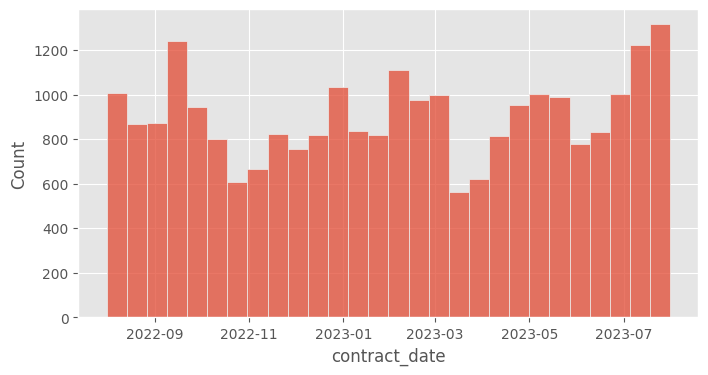

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(month_df['contract_date'])
plt.show()

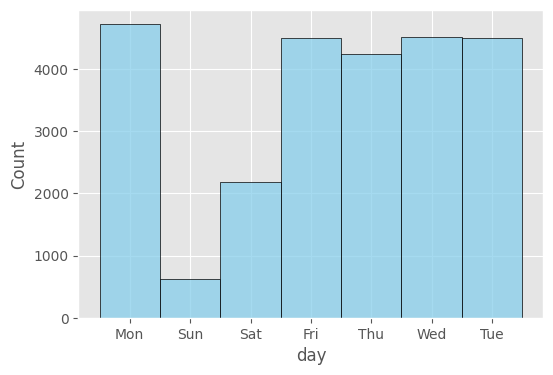

In [18]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(6,4))
sns.histplot(month_df['day'], color='skyblue', edgecolor='black')
plt.show()

### Removing outliers and data points of no use

(6801, 17)


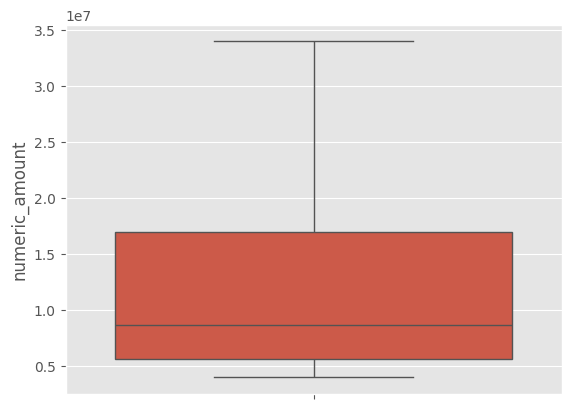

In [19]:
tender_df = month_df[month_df['numeric_amount']>4e6].reset_index(drop=True).copy()
print(tender_df.shape)
sns.boxplot(tender_df['numeric_amount'], showfliers=False)
# sns.histplot(tender_df['day'])
plt.show()

In [20]:
month_df['numeric_amount'].describe().reset_index()

,index,numeric_amount
0,count,2.529100e+04
1,mean,1.272915e+07
2,std,2.148471e+08
3,min,-9.999900e+04
4,25%,5.600000e+05
5,50%,1.600000e+06
6,75%,4.360000e+06
7,max,1.552300e+10


In [21]:
lower_q = tender_df['numeric_amount'].quantile(0.25)
upper_q = tender_df['numeric_amount'].quantile(0.75)
iqr = upper_q - lower_q

lower_lim = lower_q - 1.5 * iqr
upper_lim = upper_q + 1.5 * iqr

tender_without_outlier = tender_df[(tender_df['numeric_amount']>=lower_lim)&(tender_df['numeric_amount']<=upper_lim)]

print("Average Tender value without Outliers:", round(tender_without_outlier['numeric_amount'].mean()))
print("Median Tender value without Outliers:", round(tender_without_outlier['numeric_amount'].median()))

Average Tender value without Outliers: 10205985
Median Tender value without Outliers: 7700000


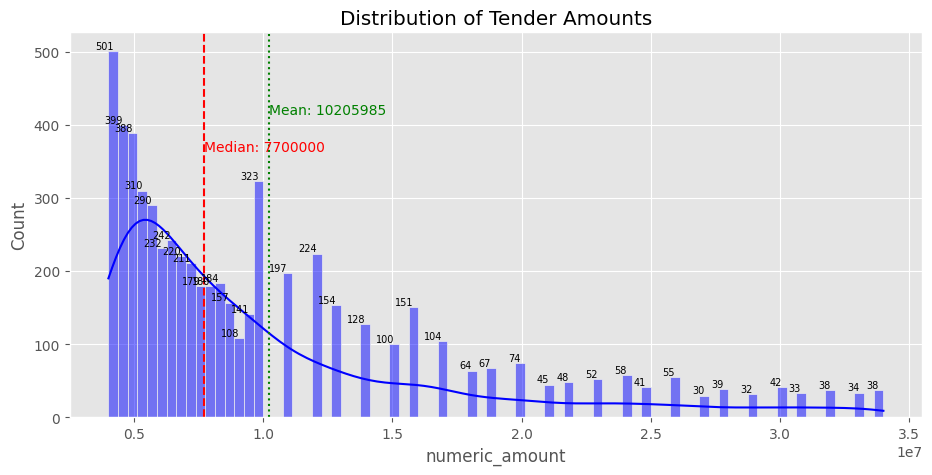

In [22]:
median_tender_amount = round(tender_without_outlier['numeric_amount'].median())
mean_tender_amount = round(tender_without_outlier['numeric_amount'].mean())

plt.figure(figsize=(11,5))
ax = sns.histplot(data=tender_without_outlier, x='numeric_amount', color='blue', kde=True, bins=80)
plt.title('Distribution of Tender Amounts')
containers = ax.containers[0]
# plt.bar_label(containers, fontsize=7)

for bar in containers.patches:
    height = bar.get_height()
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='right', va='bottom', fontsize=7)

plt.axvline(x=median_tender_amount, linestyle='--', color='red')
plt.text(median_tender_amount, 370, f'Median: {median_tender_amount}', color='red', va='center', ha='left')
plt.axvline(x=mean_tender_amount, linestyle=':', color='green')
plt.text(mean_tender_amount, 420, f'Mean: {mean_tender_amount}', color='green', va='center', ha='left')

plt.show()

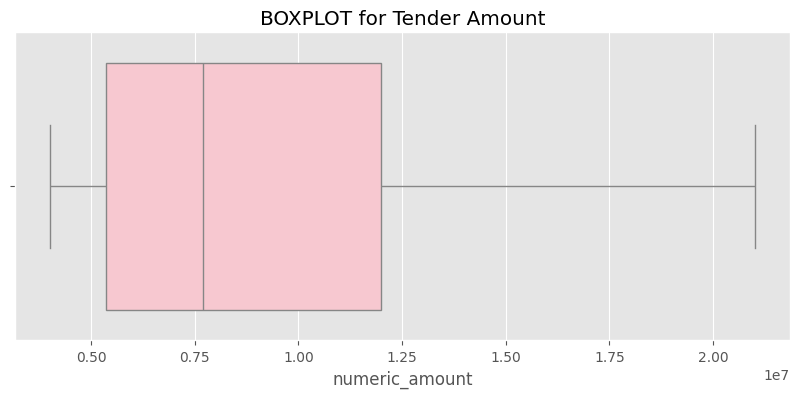

In [23]:
plt.figure(figsize=(10,4))
sns.boxplot(x=tender_without_outlier['numeric_amount'], showfliers=False, color='pink',)
plt.title('BOXPLOT for Tender Amount')
plt.show()

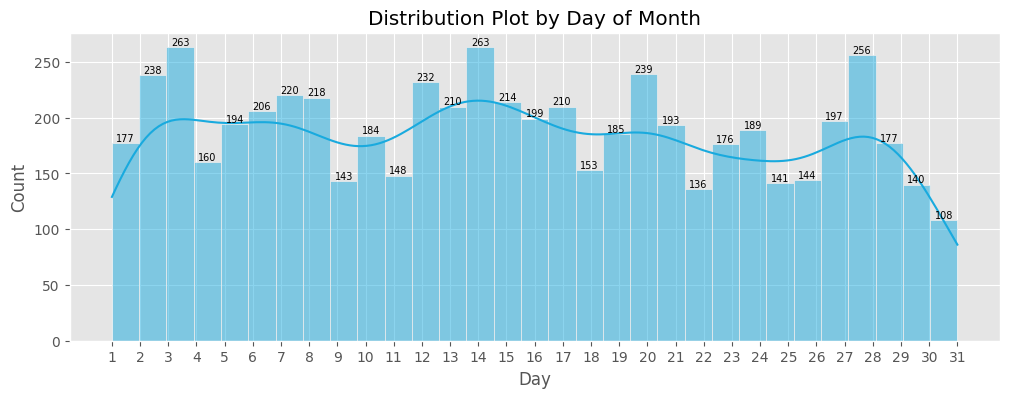

In [24]:
plt.figure(figsize=(12,4))
# Distribution Plot by Day of Month
ax= sns.histplot(data=tender_without_outlier, x='day_of_month', bins=31, color='#19AADE', kde=True,)
plt.xticks(range(1,32), labels=range(1,32), ha='center')
plt.title("Distribution Plot by Day of Month")
plt.xlabel("Day")
containers = ax.containers[0]
plt.bar_label(containers, fontsize=7)
plt.show()

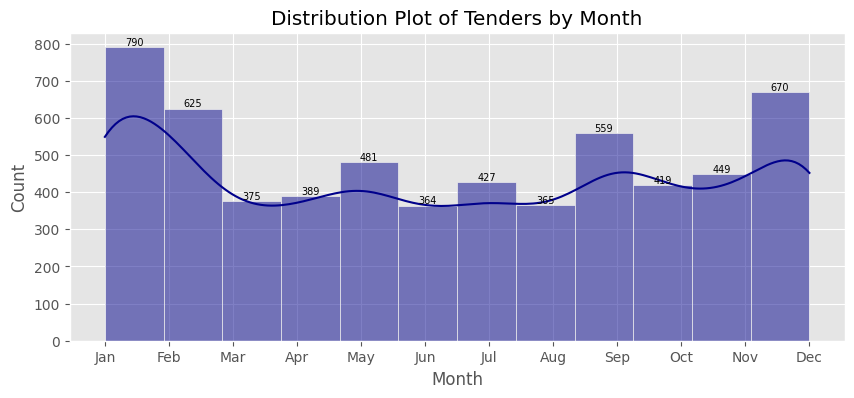

In [25]:
month_list = ['Jan', "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(10,4))
# Distribution Plot by Month
sns.histplot(data=tender_without_outlier, x='month_no', bins=12, color='darkblue', kde=True,)
plt.xticks(range(1,13), labels=month_list, ha='center')
plt.title("Distribution Plot of Tenders by Month")
plt.xlabel("Month")

containers = plt.gca().containers[0]
plt.bar_label(containers, fontsize=7)
plt.show()
# tender_without_outlier['day_of_month'].value_counts().sort_index()

In [26]:
tender_without_outlier.head(3)

,authority,stage,contract_date,contract_amount,city,tender_id,state,categories,numeric_amount,year,quarter,month_name,month_no,week_of_year,week,day_of_month,day
0,Public Health Engineering Department,AOC,2023-07-31,₹ 40.9 Lac,Balaghat,2023_PHED_254830_1,Madhya Pradesh,"Civil And Construction, Civil Works Water Work...",4090000.0,2023,3,Jul,7,2023 W31,31,31,Mon
1,Public Health Engineering Department,AOC,2023-07-31,₹ 43.5 Lac,Balaghat,2023_PHED_255044_1,Madhya Pradesh,"Civil And Construction, Civil Works Water Work...",4350000.0,2023,3,Jul,7,2023 W31,31,31,Mon
3,Public Health Engineering Department,AOC,2023-07-31,₹ 43.4 Lac,Balaghat,2023_PHED_255047_1,Madhya Pradesh,"Civil And Construction, Civil Works Water Work...",4340000.0,2023,3,Jul,7,2023 W31,31,31,Mon
